In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/mjhans/dev/gitRepo/basic_mathmatics/statics/chicago_crime/Chicago_Crimes_2001_to_2004.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y %I:%M:%S %p") # errors='ignore'
df["Day"] = df["Date"].dt.date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

/Users/mjhans/dev/pythonVenv/python36_dev/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
newDf = df.filter(['Year', 'Month','Day','Primary Type'], axis=1)
newDf["Primary Type"].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL'],
      dtype=object)

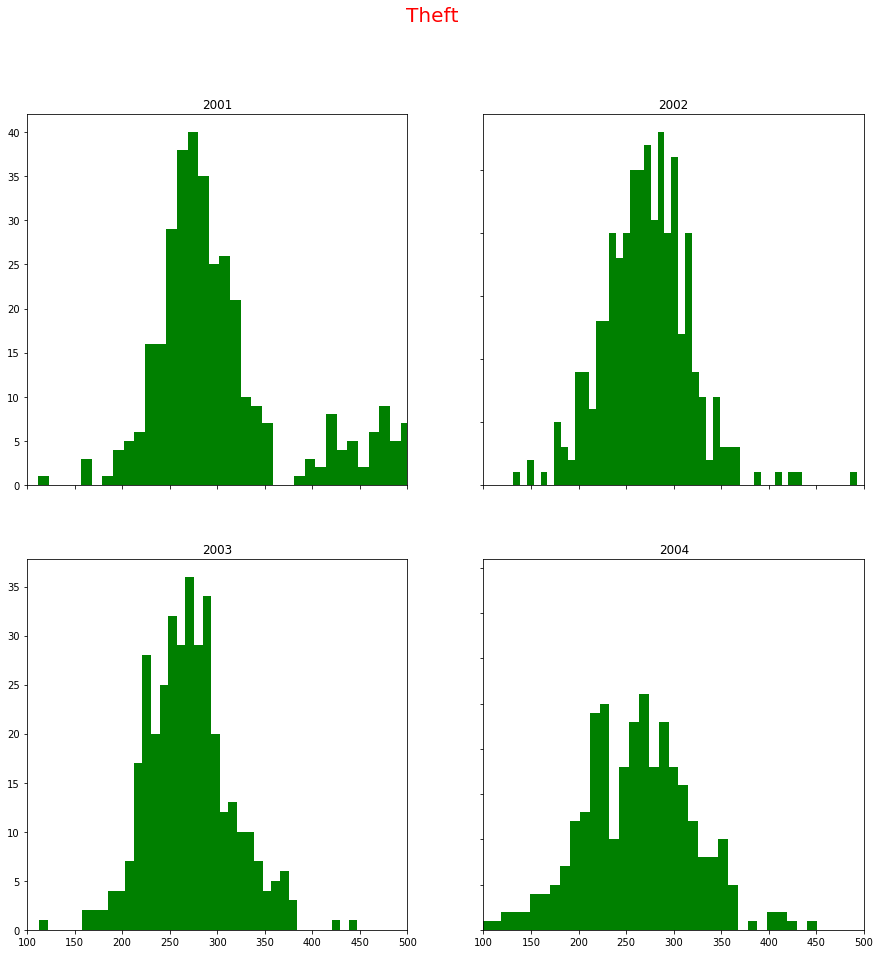

In [18]:
# calaculate histogram with THEFT, MOTOR VEHICLE THEFT, GAMBLING, ASSAULT, STALKING

theft_df = newDf[newDf["Primary Type"] == "THEFT"]

histDF = theft_df.groupby(["Year", "Day"], as_index=False).agg("count").filter(["Year", "Primary Type"])
n_bins = 50
#fig = plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#histData.hist(bins=5)


histData = histDF[histDF["Year"] == 2001].filter(["Primary Type"])
axs[0,0].hist(histData.values, bins=n_bins, color="green")
axs[0,0].set_title("2001")

histData = histDF[histDF["Year"] == 2002].filter(["Primary Type"])
axs[0,1].hist(histData.values, bins=n_bins, color="green")
axs[0,1].set_title("2002")

histData = histDF[histDF["Year"] == 2003].filter(["Primary Type"])
axs[1,0].hist(histData.values, bins=n_bins, color="green")
axs[1,0].set_title("2003")

histData = histDF[histDF["Year"] == 2004].filter(["Primary Type"])
axs[1,1].hist(histData.values, bins=n_bins, color="green")
axs[1,1].set_title("2004")


fig.suptitle('Theft', fontsize=20, color="red")
for ax in axs.flat:
	ax.set_xlim([100, 500])
	ax.label_outer()

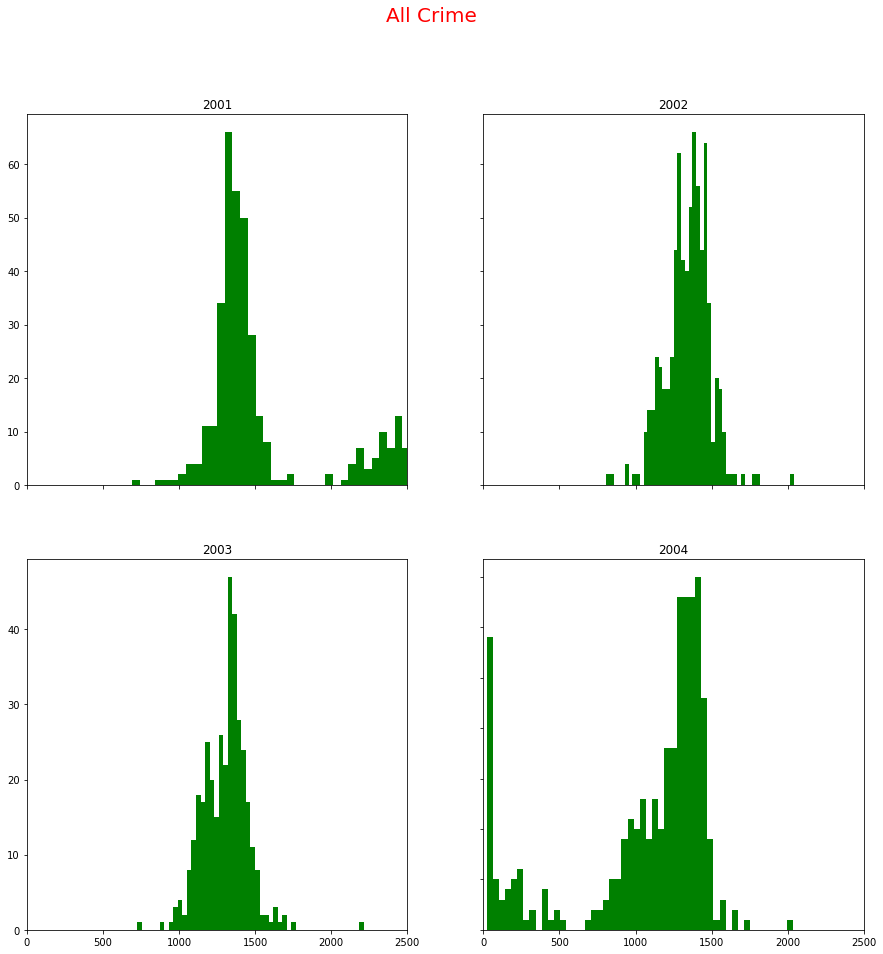

In [20]:
all_df = newDf
histDF = all_df.groupby(["Year", "Day"], as_index=False).agg("count").filter(["Year", "Primary Type"])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#histData.hist(bins=5)


histData = histDF[histDF["Year"] == 2001].filter(["Primary Type"])
axs[0,0].hist(histData.values, bins=n_bins, color="green")
axs[0,0].set_title("2001")

histData = histDF[histDF["Year"] == 2002].filter(["Primary Type"])
axs[0,1].hist(histData.values, bins=n_bins, color="green")
axs[0,1].set_title("2002")

histData = histDF[histDF["Year"] == 2003].filter(["Primary Type"])
axs[1,0].hist(histData.values, bins=n_bins, color="green")
axs[1,0].set_title("2003")

histData = histDF[histDF["Year"] == 2004].filter(["Primary Type"])
axs[1,1].hist(histData.values, bins=n_bins, color="green")
axs[1,1].set_title("2004")


fig.suptitle('All Crime', fontsize=20, color="red")
for ax in axs.flat:
	ax.set_xlim([0, 2500])
	ax.label_outer()

